# Covariance and Correlation


In probability theory and statistics, the mathematical concepts of covariance and correlation are very similar. Both describe the degree to which two random variables or sets of random variables tend to deviate from their expected values in similar ways.

If X and Y are two random variables, with means (expected values) μX and μY and standard deviations σX and σY, respectively, then their covariance and correlation are as follows:

**covariance** 
${\displaystyle {\text{cov}}_{XY}=\sigma _{XY}=E[(X-\mu _{X})\,(Y-\mu _{Y})]}{\displaystyle {\text{cov}}_{XY}=\sigma _{XY}=E[(X-\mu _{X})\,(Y-\mu _{Y})]}$

**correlation**
${\displaystyle {\text{corr}}_{XY}=\rho _{XY}=E[(X-\mu _{X})\,(Y-\mu _{Y})]/(\sigma _{X}\sigma _{Y})}{\displaystyle {\text{corr}}_{XY}=\rho _{XY}=E[(X-\mu _{X})\,(Y-\mu _{Y})]/(\sigma _{X}\sigma _{Y})}$

so that

${\displaystyle \rho _{XY}=\sigma _{XY}/(\sigma _{X}\sigma _{Y})}$
where E is the expected value operator. Notably, correlation is dimensionless while covariance is in units obtained by multiplying the units of the two variables.

If Y always takes on the same values as X, we have the covariance of a variable with itself (i.e. ${\displaystyle \sigma _{XX}}\sigma _{XX})$, which is called the variance and is more commonly denoted as ${\displaystyle \sigma _{X}^{2},}\sigma _{X}^{2}$, the square of the standard deviation. The correlation of a variable with itself is always 1 (except in the degenerate case where the two variances are zero because X always takes on the same single value, in which case the correlation does not exist since its computation would involve division by 0). More generally, the correlation between two variables is 1 (or –1) if one of them always takes on a value that is given exactly by a linear function of the other with respectively a positive (or negative) slope.

Although the values of the theoretical covariances and correlations are linked in the above way, the probability distributions of sample estimates of these quantities are not linked in any simple way and they generally need to be treated separately.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn.apionly as sns
%matplotlib inline

C:\Users\Shady\Anaconda3\lib\site-packages\matplotlib\__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
C:\Users\Shady\Anaconda3\lib\site-packages\matplotlib\__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)
C:\Users\Shady\Anaconda3\lib\site-packages\seaborn\apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


C:\Users\Shady\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 2160x1080 with 0 Axes>

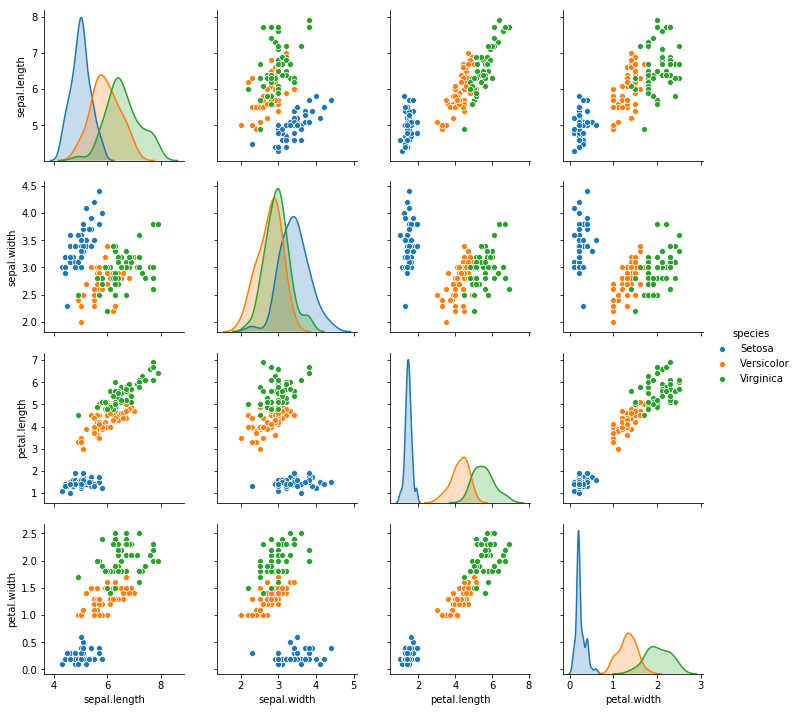

In [4]:
# read dataset
df = pd.read_csv('iris.csv')

# create scatterplot matrix
plt.figure(figsize=(30,15))
fig = sns.pairplot(data=df, 
                   hue='Species')

plt.show()

## Sample Covariance

- Measures how two variables differ from their mean
- Positive covariance: that the two variables are both above or both below their respective means
- Variables with a positive covariance are positively "correlated" -- they go up or done together
- Negative covariance: valuables from one variable tends to be above the mean and the other below their mean
- In other words, negative covariance means that if one variable goes up, the other variable goes down

$$\sigma_{x,y} = \frac{1}{n-1} \sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})$$

- Note that similar to variance, the dimension of the covariance is $unit^2$
- Covariance can be understood as the "variability due to codependence" whereas the variance is the "independent variability"

### Simple example

[[ 12.64   7.68  -9.6 ]
 [  7.68  17.36 -13.8 ]
 [ -9.6  -13.8   14.8 ]]


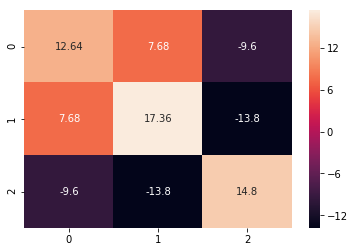

In [10]:
A = [45,37,42,35,39]
B = [38,31,26,28,33]
C = [10,15,17,21,12]

data = np.array([A,B,C])
covMatrix = np.cov(data,bias=True)
print(covMatrix)
sns.heatmap(covMatrix, annot=True, fmt='g')
plt.show()

### Covariance using 'iris data'

In [12]:
X = df[df.columns[:-1]].values
X.shape

(150, 4)

In [13]:
x_mean, y_mean = np.mean(X[:, 2:4], axis=0)

sum([(x - x_mean) * (y - y_mean) 
     for x, y in zip(X[:, 2], X[:, 3])]) / (X.shape[0] - 1)

1.2956093959731545

Covariance matrix for the 4-feature dataset:

$$
\Sigma = \begin{bmatrix}
    \sigma_{1}^2  & \sigma_{1,2} & \sigma_{1,3} & \sigma_{1,4} \\
    \sigma_{2,1}  & \sigma_{2}^2 & \sigma_{2,3} & \sigma_{2,4} \\
    \sigma_{3,1}  & \sigma_{3,2} & \sigma_{3}^2 & \sigma_{4,3} \\
    \sigma_{4,1}  & \sigma_{4,2} & \sigma_{4,3} & \sigma_{4}^2
\end{bmatrix}
$$

- Notice the variance along the diagonal
- Remember, the sample variance is computed as follows:

$$\sigma^2_x = \frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{x})^2$$

In [15]:
Iris_covMat=np.cov(X.T)
Iris_covMat

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

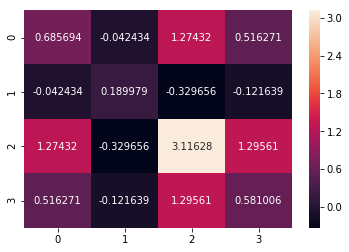

In [16]:
sns.heatmap(Iris_covMat, annot=True, fmt='g')
plt.show()

## Pearson Correlation Coefficient

- The pearson correlation is "dimensionless" version of the covariance, achieved by dividing by the standard deviation

- Remember, the standard deviation is computed as follows:
        
$$\sigma_x = \sqrt{\frac{1}{n-1}{\sum_{i=1}^n (x_i - \bar{x})^2}}$$    

- Pearson correlation:

$$\rho_{x, y} = \frac{\frac{1}{n-1} \sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\frac{1}{n-1}{\sum_{i=1}^n (x_i - \bar{x})^2}} \sqrt{\frac{1}{n-1}{\sum_{i=1}^n (y_i - \bar{y})^2}}}
$$

$$
= \frac{\sigma_{x,y}}{\sigma_x \sigma_y}
$$

- Measures degree of a linear relationship between variables, assuming the variables follow a normal distribution
- $\rho=1$: perfect positive correlation
- $\rho=-1$: perfect negative correlation
- $\rho=0$: no correlation

### Simple example

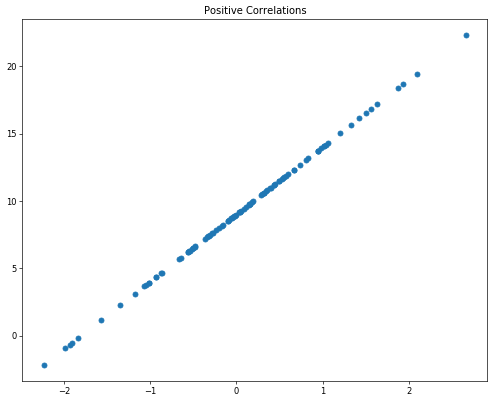

In [31]:
x=np.random.randn(100)
y1= x*5 +9 



plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':60})
plt.scatter(x, y1, label=f'y1 Correlation = {np.round(np.corrcoef(x,y1)[0,1], 2)}')


plt.title('Positive Correlations')
plt.show()

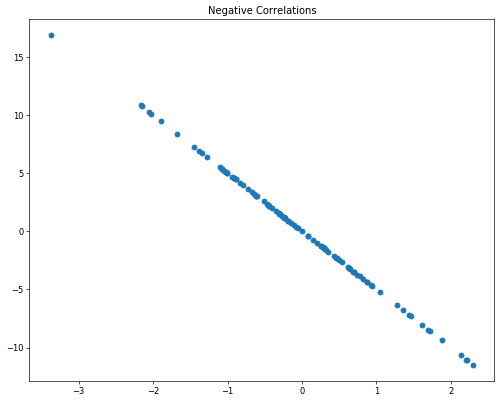

In [30]:
# Scatterplot and Correlations
# Data
x=np.random.randn(100)
y2= -5*x


plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':60})
plt.scatter(x, y2, label=f'y2 Correlation = {np.round(np.corrcoef(x,y2)[0,1], 2)}')


plt.title('Negative Correlations')
plt.show()

### Correlation using 'iris data'

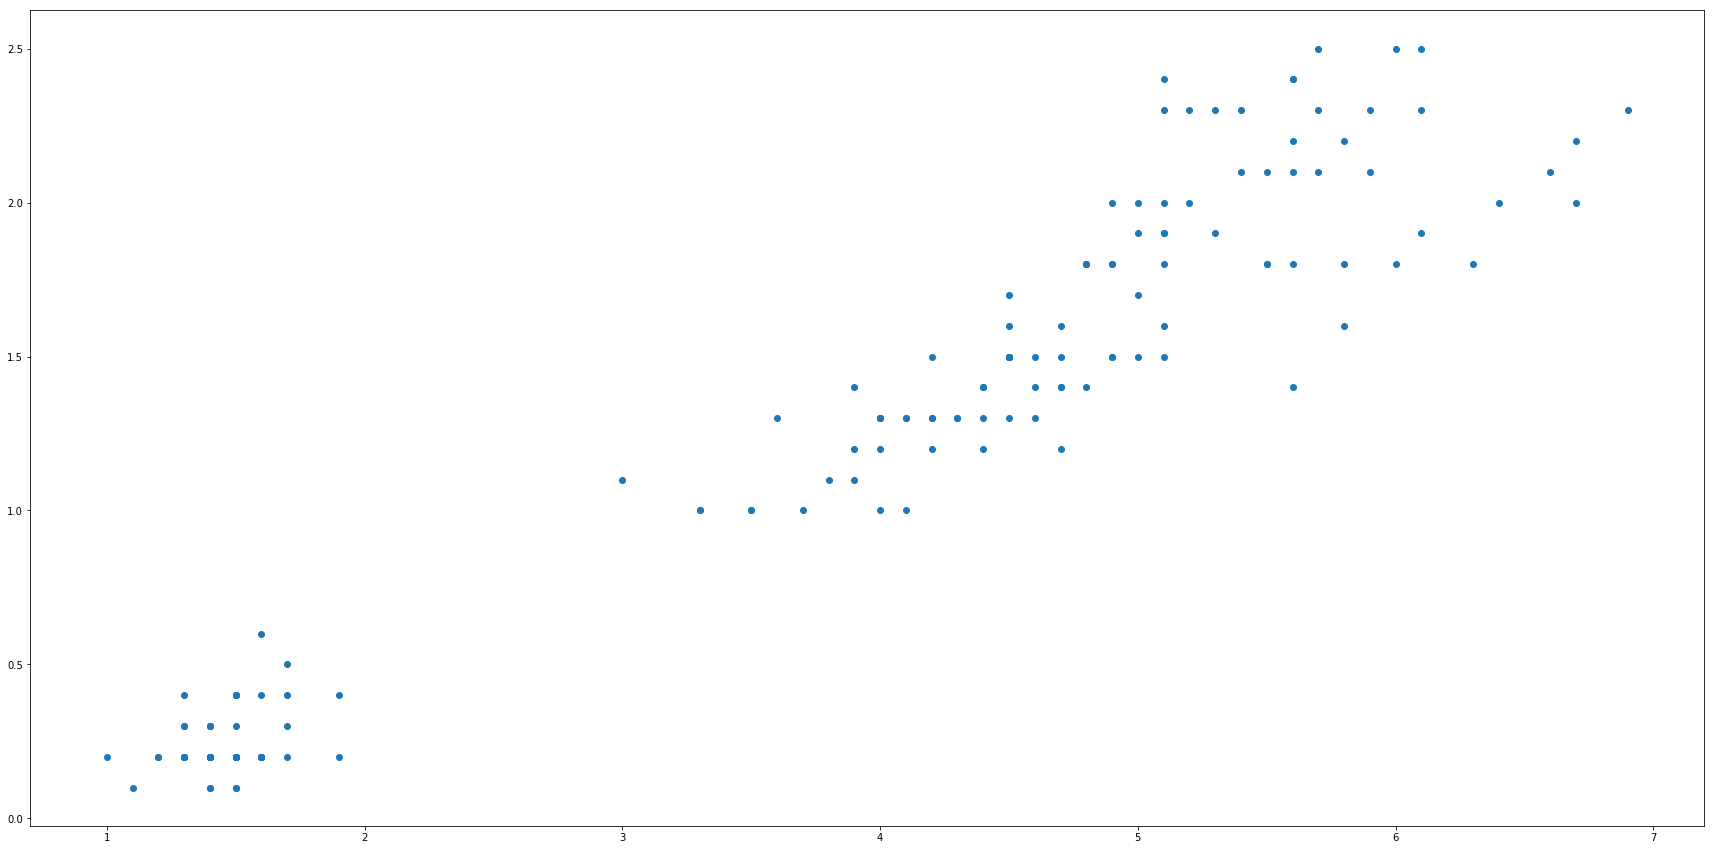

In [17]:
plt.figure(figsize=(30,15))
plt.scatter(X[:, 2], X[:, 3])

In [18]:
(np.cov(X[:, 2:4].T)[0, 1] / 
 (np.std(X[:, 2], ddof=1) * np.std(X[:, 3], ddof=1)))

0.9628654314027962

In [19]:
(np.cov(X[:, 2:4].T, ddof=0)[0, 1] / 
 (np.std(X[:, 2], ddof=0) * np.std(X[:, 3], ddof=0)))

0.9628654314027962

In [20]:
np.corrcoef(X[:, 2:4].T)

array([[1.        , 0.96286543],
       [0.96286543, 1.        ]])

In [21]:
stats.pearsonr(X[:, 2], X[:, 3])

(0.9628654314027961, 4.675003907327543e-86)

> The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets. The p-values are not entirely reliable but are probably reasonable for datasets larger than 500 or so.  
(https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.stats.pearsonr.html)

## About Scaled Variables

In [22]:
standardized = (X - X.mean()) / X.std()

#### Pearson unaffected

In [23]:
np.corrcoef(X.T)

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [24]:
np.corrcoef(standardized.T)

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

#### Covariance affected

In [25]:
np.cov(X.T)

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

In [26]:
np.cov(standardized.T)

array([[ 0.17599681, -0.01089153,  0.32707828,  0.13251109],
       [-0.01089153,  0.04876198, -0.08461283, -0.03122115],
       [ 0.32707828, -0.08461283,  0.7998544 ,  0.3325438 ],
       [ 0.13251109, -0.03122115,  0.3325438 ,  0.14912676]])